In [4]:
#Load libraries and set some options
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"SciPy version:  {scipy.__version__}")

# show all columns when displaying a dataframe, for instance with the head() method
pd.options.display.max_columns = None

# display multiple outputs from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pandas version: 1.0.5
Numpy version: 1.20.0
Matplotlib version: 3.2.2
Seaborn version: 0.11.0
SciPy version:  1.5.0


In [5]:
df = pd.read_csv("../dataset/Telco-Customer-Churn.csv")

First look at basic information about dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Duplicated Rows (except first occurence): 0

Statistical Summary: 



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


dtype 'object' column information: 

5696-CEIQJ    1
0568-ONFPC    1
4654-DLAMQ    1
6585-WCEWR    1
4702-IOQDC    1
             ..
6917-FIJHC    1
6402-SSEJG    1
7909-FIOIY    1
6483-OATDN    1
3197-NNYNB    1
Name: customerID, Length: 7043, dtype: int64


Male      3555
Female    3488
Name: gender, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No int

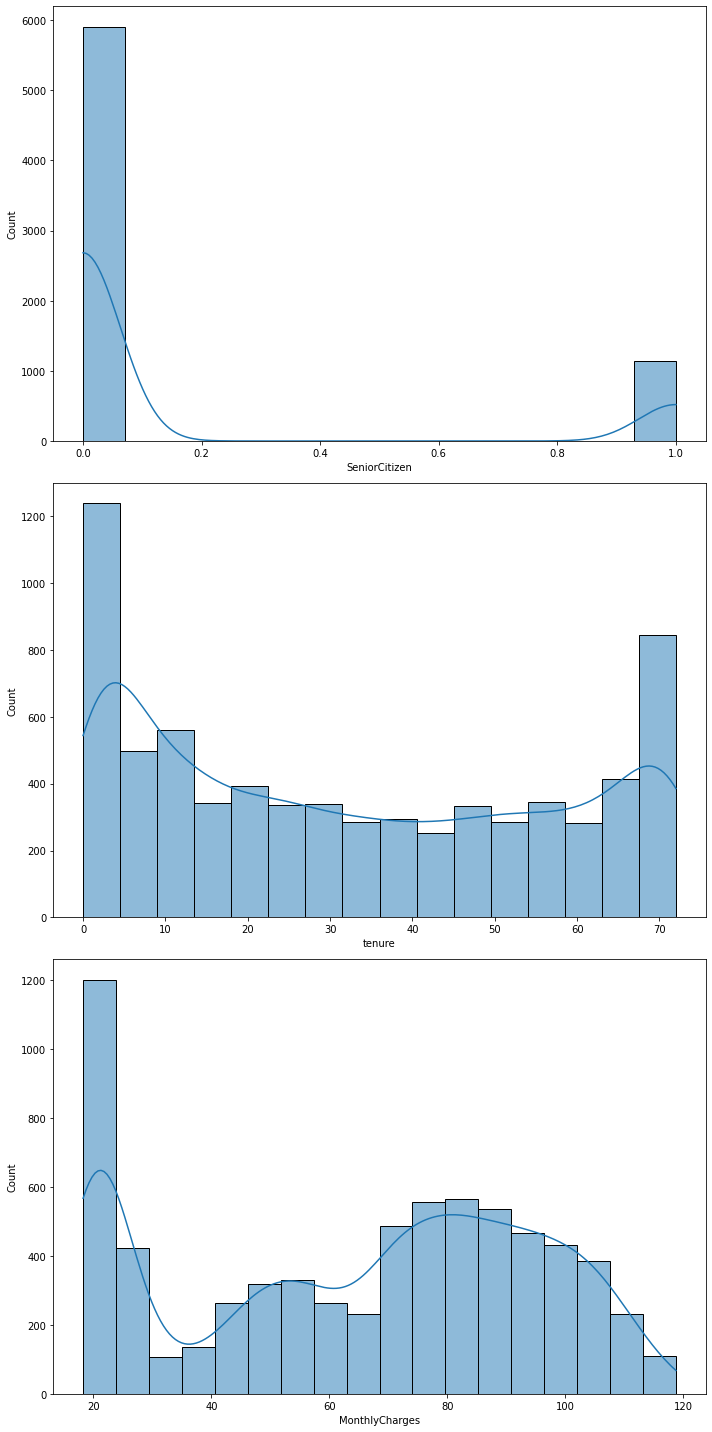

In [6]:
def categorical_col_info(df):
    print("dtype 'object' column information: \n")
    for col in df.columns:
        if str(df[col].dtype) == 'object':
            print(df[col].value_counts())
            print("\n")
    
df.head(5)
df.info()
print("\nMissing Values:")
df.isnull().sum()
dups = df.duplicated()
print(f"\nDuplicated Rows (except first occurence): {len(dups[dups == True].index)}\n")
print("Statistical Summary: \n")
df.describe()
categorical_col_info(df)
print("Numerical columns' histograms and KDEs: \n")
_ = plt.figure(figsize=(10,20))
df_numerical = df.select_dtypes(exclude='object')
for i in range(len(df_numerical.columns)):
    _ = plt.subplot(len(df_numerical.columns), 1, i + 1)
    _ = sns.histplot(df_numerical[df_numerical.columns[i]], kde=True)
_ = plt.tight_layout()

Some immedate changes to make right away: remove the key column as it's not relevant here; convert `SeniorCitizen` column to string because we don't want numerical summaries for it, and we can one-hot encode it later; convert `tenure` column to float; drop `TotalCharges` as it seems to be just `tenure` * `MonthlyCharges` hence it's redundant.

In [6]:
df.drop(['customerID', 'TotalCharges'], axis=1, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['tenure'] = df['tenure'].astype(np.float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


dtype 'object' column information: 

Male      3555
Female    3488
Name: gender, dtype: int64


No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport,

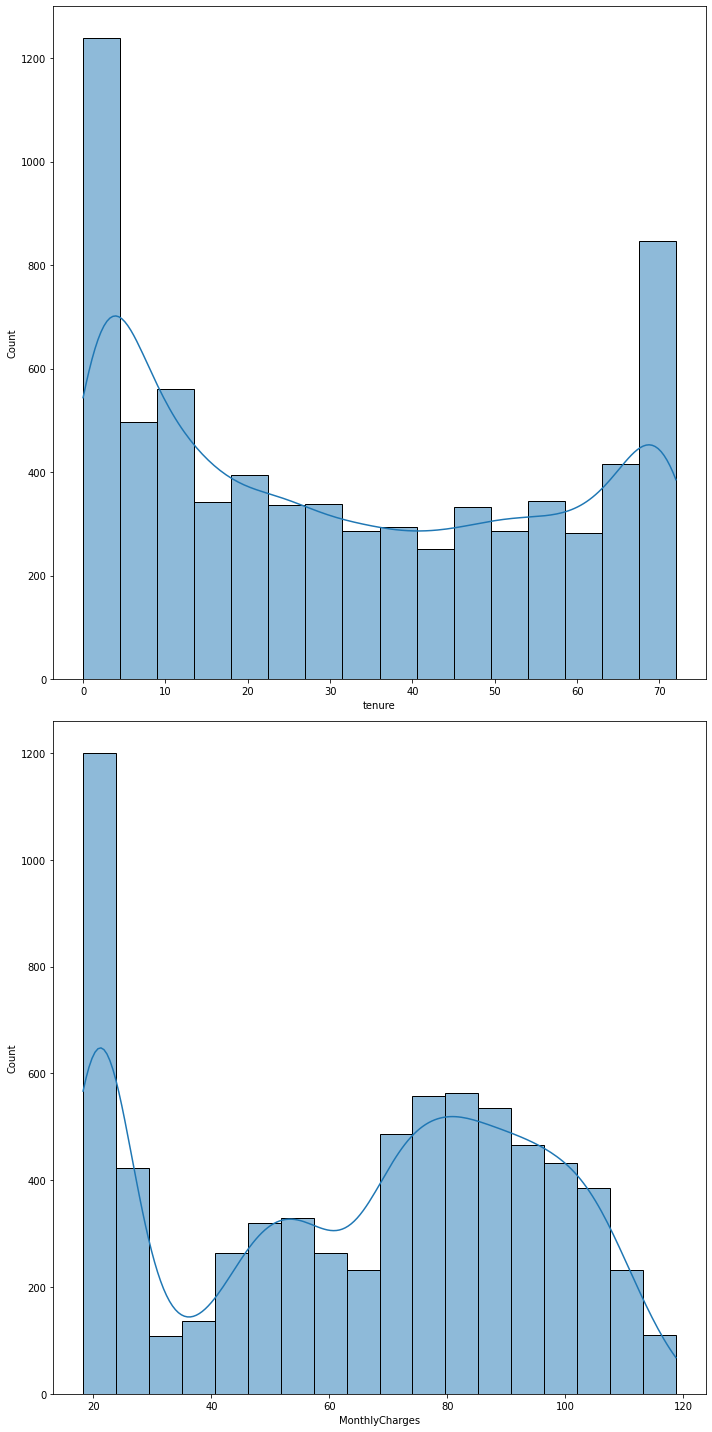

In [24]:
df.info()
print("Statistical Summary: \n")
df.describe()
categorical_col_info(df)
print("Numerical columns' histograms and KDEs: \n")
_ = plt.figure(figsize=(10,20))
df_numerical = df.select_dtypes(exclude='object')
for i in range(len(df_numerical.columns)):
    _ = plt.subplot(len(df_numerical.columns), 1, i + 1)
    _ = sns.histplot(df_numerical[df_numerical.columns[i]], kde=True)
_ = plt.tight_layout()

Looking good.

Let's see if there are any obvious differences in our two target groups

In [25]:
df_left = df[df['Churn'] == 'Yes']
df_stayed = df[df['Churn'] == 'No']
df_left.describe()
df_stayed.describe()

,tenure,MonthlyCharges
count,1869.000000,1869.000000
mean,17.979133,74.441332
std,19.531123,24.666053
min,1.000000,18.850000
25%,2.000000,56.150000
50%,10.000000,79.650000
75%,29.000000,94.200000
max,72.000000,118.350000


,tenure,MonthlyCharges
count,5174.000000,5174.000000
mean,37.569965,61.265124
std,24.113777,31.092648
min,0.000000,18.250000
25%,15.000000,25.100000
50%,38.000000,64.425000
75%,61.000000,88.400000
max,72.000000,118.750000


Let's check for independence of the categorical columns against the target column

In [17]:
def chi2_independence_test(df, rows, cols):
    print("chi2 test for categorical-categorical independence\n")
    for row in rows:
        for col in cols:
            ct = pd.crosstab(df[row], df[col])
            p = stats.chi2_contingency(ct)[1]
            print(f"{row} against {col} p-value: {p}")
            
categorical_cols = list(df.select_dtypes(include="object"))
categorical_cols.remove('Churn')
chi2_independence_test(df, ['Churn'], categorical_cols)

chi2 test for categorical-categorical independence

Churn against gender p-value: 0.48657873605618596
Churn against SeniorCitizen p-value: 1.510066805092378e-36
Churn against Partner p-value: 2.1399113440759935e-36
Churn against Dependents p-value: 4.9249216612154196e-43
Churn against PhoneService p-value: 0.3387825358066928
Churn against MultipleLines p-value: 0.0034643829548773
Churn against InternetService p-value: 9.571788222840544e-160
Churn against OnlineSecurity p-value: 2.6611496351768565e-185
Churn against OnlineBackup p-value: 2.0797592160865457e-131
Churn against DeviceProtection p-value: 5.505219496457244e-122
Churn against TechSupport p-value: 1.4430840279999813e-180
Churn against StreamingTV p-value: 5.528994485739024e-82
Churn against StreamingMovies p-value: 2.667756755723681e-82
Churn against Contract p-value: 5.863038300673391e-258
Churn against PaperlessBilling p-value: 4.073354668665985e-58
Churn against PaymentMethod p-value: 3.6823546520097993e-140


Could do much more visualization and EDA but let's get on with the modeling

In [7]:
from sklearn.model_selection import train_test_split

y = df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)
X = df.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Setup for testing many model types over hyperparameter grids

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, ClassifierMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [9]:
def numerical_categorical_columns(df, return_names=True):
    """
    Arguments: pandas DataFrame
    Returns: tuple (list1, list2), lists contain strings of column titles
    """
    categorical = list(df.select_dtypes(include='object').columns)
    numerical = list(df.select_dtypes(exclude='object').columns)
    if return_names:
        return (numerical, categorical)
    
    numerical_idx = [df.columns.get_loc(c) for c in numerical]
    categorical_idx = [df.columns.get_loc(c) for c in categorical]
    return (numerical_idx, categorical_idx)
        
     
class NumericalFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, scale=True, feature_degree=1, interaction_only=True, pca=0):
        self.feature_degree = feature_degree
        self.interaction_only = interaction_only
        self.pca = pca
        self.scale = scale
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.feature_degree > 1:
            poly = PolynomialFeatures(self.feature_degree,
                                      interaction_only=self.interaction_only,
                                      include_bias=False)
            X = poly.fit_transform(X)
                 
        if self.scale:
            scaler = StandardScaler()
            X = scaler.fit_transform(X)
        
        if self.pca > 0:
            pca = PCA(n_components=self.pca)
            X = pca.fit_transform(X)
            
        return X
    
    
    
class CategoricalFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        encoder = OneHotEncoder()
        X = encoder.fit_transform(X)
        return X
    
      
class TryoutClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model="svc", svc_C=1.0, kernel='rbf', gamma='scale', n_neighbors=5, p=1,
                 n_estimators=100, min_samples_split=2, min_samples_leaf=1, min_impurity_decrease=0.0,
                 max_features='auto', lr_C=1.0, lr_max_iter=100):
        self.model = model
        self.svc_C = svc_C
        self.kernel = kernel
        self.gamma = gamma
        self.n_neighbors = n_neighbors
        self.p = p
        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_impurity_decrease = min_impurity_decrease
        self.max_features=max_features
        self.lr_C = lr_C
        self.lr_max_iter = lr_max_iter
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        self.estimator = None 
        
        if self.model == "svc":
            self.estimator = SVC(kernel=self.kernel,
                                 C=self.svc_C,
                                 gamma=self.gamma)
        elif self.model == "knn":
            self.estimator = KNeighborsClassifier(n_neighbors=self.n_neighbors,
                                                  p=self.p)
        elif self.model == "random_forest":
            self.estimator = RandomForestClassifier(n_estimators=self.n_estimators,
                                                    min_samples_split=self.min_samples_split,
                                                    min_samples_leaf=self.min_samples_leaf,
                                                    min_impurity_decrease=self.min_impurity_decrease,
                                                    max_features=self.max_features)  
        elif self.model == "logistic_regression":
            self.estimator = LogisticRegression(C=self.lr_C,
                                                max_iter=self.lr_max_iter)
        
        self.X_ = X
        self.y_ = y
        self.estimator.fit(X, y)
        
        return self
    
    def predict(self, X):
        X = check_array(X)
        
        return self.estimator.predict(X)
    

In [7]:
numerical_cols, categorical_cols = numerical_categorical_columns(X_train)

num_pipeline = Pipeline([
    ('transformations', NumericalFeatureTransformer())
])

cat_pipeline = Pipeline([
    ("encode", CategoricalFeatureTransformer())
])

col_transformer = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
], remainder='passthrough')

full_pipeline = Pipeline([
    ("preprocessing", col_transformer),
    ("modeling", TryoutClassifier())
])


svc_param_grid = {
    "modeling__model": ["svc"],
    "modeling__kernel": ["linear", "rbf"],
    "modeling__svc_C": [1.0, 10.0, 100.0],
    "modeling__gamma": ["scale", "auto"]
}

knn_param_grid = {
    "modeling__model": ["knn"],
    "modeling__n_neighbors": [4, 8, 16],
    "modeling__p": [1, 2]
}

rf_param_grid = {
    "modeling__model": ["random_forest"],
    "modeling__n_estimators": [100, 150, 200],
    "modeling__min_samples_split": [4, 8, 16],
    "modeling__min_samples_leaf": [2, 4, 8]
}

lr_param_grid = {
    "modeling__model": ["logistic_regression"],
    "modeling__lr_C": [1.0, 10.0, 100.0, 1000.0],
    "modeling__lr_max_iter": [100, 1000, 10000]
}

param_grid_list = [svc_param_grid, knn_param_grid, rf_param_grid, lr_param_grid]

scoring = "accuracy"

search = GridSearchCV(full_pipeline, 
                      param_grid_list, 
                      n_jobs=-1, 
                      verbose=1, 
                      scoring=scoring)
search.fit(X_train, y_train)


print(f"best score: {search.best_score_}")
print("best parameters:")
print(search.best_params_)
results = search.cv_results_
results = pd.concat([pd.DataFrame(results["params"]),
                     pd.DataFrame(results["mean_test_score"], columns=[scoring]),
                     pd.DataFrame(results["std_test_score"], columns=["std_" + scoring])], axis=1)
results.sort_values(by=[scoring], ascending=False, inplace=True)
results.head(20)

Fitting 5 folds for each of 57 candidates, totalling 285 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('transformations',
                                                                                          NumericalFeatureTransformer())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          CategoricalFeatureTransformer())]),
                                                               

best score: 0.8017772927955047
best parameters:
{'modeling__lr_C': 1000.0, 'modeling__lr_max_iter': 100, 'modeling__model': 'logistic_regression'}


,modeling__gamma,modeling__kernel,modeling__model,modeling__svc_C,modeling__n_neighbors,modeling__p,modeling__min_samples_leaf,modeling__min_samples_split,modeling__n_estimators,modeling__lr_C,modeling__lr_max_iter,accuracy,std_accuracy
56,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,10000.0,0.801777,0.009879
55,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,0.801777,0.009879
54,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,100.0,0.801777,0.009879
50,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10000.0,0.801777,0.009687
48,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,10.0,100.0,0.801777,0.009687
49,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1000.0,0.801777,0.009687
51,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0,0.801588,0.009898
52,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,100.0,1000.0,0.801588,0.009898
53,NaN,NaN,logistic_regression,NaN,NaN,NaN,NaN,NaN,NaN,100.0,10000.0,0.801588,0.009898
40,NaN,NaN,random_forest,NaN,NaN,NaN,8.0,8.0,150.0,NaN,NaN,0.801018,0.011851


Not good. Lets try again after removing outliers. While we're at it, let's up-sample the minority class, to increase the number of instances and make this a balanced learning problem, so that accuracy will be a good performance metric. Let's also make our hyperparameter grid a little finer.

In [10]:
from sklearn.svm import OneClassSVM
from imblearn.over_sampling import SMOTENC

numerical_cols, categorical_cols = numerical_categorical_columns(X_train)
numerical_idx, categorical_idx = numerical_categorical_columns(X_train, return_names=False) 

num_pipeline = Pipeline([
    ('transformations', NumericalFeatureTransformer())
])

cat_pipeline = Pipeline([
    ("encode", CategoricalFeatureTransformer())
])

col_transformer = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
], remainder='passthrough')

X = df.drop(['Churn'], axis=1)
X = col_transformer.fit_transform(X)

svm = OneClassSVM(kernel='rbf', nu=0.1)
svm.fit(X)
scores = svm.decision_function(X)
inliers_idx = scores > 0

inliers_df = df.iloc[inliers_idx]

y_inliers = inliers_df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)
X_inliers = inliers_df.drop(['Churn'], axis=1)

X_train_inliers, X_test_inliers, y_train_inliers, y_test_inliers = train_test_split(X_inliers, 
                                                                                    y_inliers, 
                                                                                    random_state=42)

smote = SMOTENC(categorical_features=categorical_idx)
X_train_inliers_smote, y_train_inliers_smote = smote.fit_sample(X_train_inliers, y_train_inliers)

OneClassSVM(nu=0.1)

In [18]:
inliers_df.index.size

6337

In [19]:
num_pipeline = Pipeline([
    ('transformations', NumericalFeatureTransformer())
])

cat_pipeline = Pipeline([
    ("encode", CategoricalFeatureTransformer())
])

col_transformer = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
], remainder='passthrough')

full_pipeline = Pipeline([
    ("preprocessing", col_transformer),
    ("modeling", TryoutClassifier())
])


svc_param_grid = {
    "modeling__model": ["svc"],
    "modeling__kernel": ["linear", "rbf"],
    "modeling__svc_C": [1.0, 10.0, 100.0],
    "modeling__gamma": ["scale", "auto"]
}

knn_param_grid = {
    "modeling__model": ["knn"],
    "modeling__n_neighbors": [4, 8, 16],
    "modeling__p": [1, 2]
}

rf_param_grid = {
    "modeling__model": ["random_forest"],
    "modeling__n_estimators": [10, 50, 100, 150, 200, 250],
    "modeling__min_samples_split": [2, 4, 8, 16, 32, 1.0, 2.0],
    "modeling__min_samples_leaf": [1, 2, 4, 8, 16, 1.0, 2.0],
    "modeling__max_features": ['auto', 'log2', None, 0.3]
}

lr_param_grid = {
    "modeling__model": ["logistic_regression"],
    "modeling__lr_C": [0.1, 1.0, 2.0, 5.0, 10.0, 100.0],
    "modeling__lr_max_iter": [100, 1000, 10000]
}

param_grid_list = [svc_param_grid, knn_param_grid, rf_param_grid, lr_param_grid]

scoring = "accuracy"

search = GridSearchCV(full_pipeline, 
                      param_grid_list, 
                      n_jobs=-1, 
                      verbose=1, 
                      scoring=scoring,
                      cv=3)
search.fit(X_train_inliers_smote, y_train_inliers_smote)


print(f"best score: {search.best_score_}")
print("best parameters:")
print(search.best_params_)
results = search.cv_results_
results = pd.concat([pd.DataFrame(results["params"]),
                     pd.DataFrame(results["mean_test_score"], columns=[scoring]),
                     pd.DataFrame(results["std_test_score"], columns=["std_" + scoring])], axis=1)
results.sort_values(by=[scoring], ascending=False, inplace=True)
results.head(20)

Fitting 3 folds for each of 1212 candidates, totalling 3636 fits


/home/jared/Programs/python/data_science/projects/telco_churn/venv-telco/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.75308111 0.75322442 0.7527945  ... 0.77529378 0.77529378 0.77529378]
  category=UserWarning


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('transformations',
                                                                                          NumericalFeatureTransformer())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          CategoricalFeatureTransformer())]),
                                            

best score: 0.8250214961306964
best parameters:
{'modeling__max_features': 0.3, 'modeling__min_samples_leaf': 2, 'modeling__min_samples_split': 4, 'modeling__model': 'random_forest', 'modeling__n_estimators': 200}


,modeling__gamma,modeling__kernel,modeling__model,modeling__svc_C,modeling__n_neighbors,modeling__p,modeling__max_features,modeling__min_samples_leaf,modeling__min_samples_split,modeling__n_estimators,modeling__lr_C,modeling__lr_max_iter,accuracy,std_accuracy
952,NaN,NaN,random_forest,NaN,NaN,NaN,0.3,2.0,4.0,200.0,NaN,NaN,0.825021,0.040463
903,NaN,NaN,random_forest,NaN,NaN,NaN,0.3,1.0,2.0,150.0,NaN,NaN,0.824878,0.045556
20,NaN,NaN,random_forest,NaN,NaN,NaN,auto,1.0,2.0,100.0,NaN,NaN,0.824162,0.044097
313,NaN,NaN,random_forest,NaN,NaN,NaN,log2,1.0,2.0,50.0,NaN,NaN,0.823732,0.046864
904,NaN,NaN,random_forest,NaN,NaN,NaN,0.3,1.0,2.0,200.0,NaN,NaN,0.823732,0.042631
70,NaN,NaN,random_forest,NaN,NaN,NaN,auto,2.0,4.0,200.0,NaN,NaN,0.823445,0.040596
26,NaN,NaN,random_forest,NaN,NaN,NaN,auto,1.0,4.0,100.0,NaN,NaN,0.823302,0.044434
28,NaN,NaN,random_forest,NaN,NaN,NaN,auto,1.0,4.0,200.0,NaN,NaN,0.823158,0.043777
29,NaN,NaN,random_forest,NaN,NaN,NaN,auto,1.0,4.0,250.0,NaN,NaN,0.823015,0.044861
914,NaN,NaN,random_forest,NaN,NaN,NaN,0.3,1.0,8.0,100.0,NaN,NaN,0.823015,0.042057


That's a decent improvement, especially considering this time accuracy was calculated on a class-balanced dataset.

In [20]:
y_train_inliers_smote.value_counts()

1    3489
0    3489
Name: Churn, dtype: int64

Last thing to do is retrain the best performing model on the entire training set, and test it on the test set.

In [15]:
model = RandomForestClassifier(min_samples_leaf=2,
                               min_samples_split=4,
                               n_estimators=200,
                               max_features=0.3,
                               n_jobs=-1)

num_pipeline = Pipeline([
    ('transformations', StandardScaler())
])

cat_pipeline = Pipeline([
    ("encode", OneHotEncoder())
])

col_transformer = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
], remainder='passthrough')

X_train_inliers_smote_processed = col_transformer.fit_transform(X_train_inliers_smote)
#model.fit(X_train_inliers_smote_processed, y_train_inliers_smote)

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [23]:
X_test_processed = col_transformer.transform(X_test)

y_pred = model.predict(X_test_processed)

print(f"test accuracy: {accuracy_score(y_test, y_pred)}")
print(f"precision accuracy: {precision_score(y_test, y_pred)}")
print(f"recall accuracy: {recall_score(y_test, y_pred)}")

test accuracy: 0.8307779670641681
precision accuracy: 0.6541737649063032
recall accuracy: 0.8016701461377871


More tweaking might be necessary and I'd like to try XGBoost for gradient boosting and keras for neural network as well. This accuracy is higher than the Kaggle benchmark, however.

As this is a task to identify customers who are at risk for leaving the company, it would be desirable to favor recall over precision. Therefore when making predictions with this model, call `predict_proba` instead of `predict`, and classify the predictions based on whether the probability is above a certain threshold.

Lastly, let's save the datasets so we can easily recover them later, and save the preprocessing pipeline for later use as well.

In [35]:
y_train_inliers_smote.to_csv('y_train', header=False, index=False)
y_test.to_csv('y_test', header=False, index=False)
np.save('X_train', X_train_inliers_smote_processed)
np.save('X_test', X_test_processed)

In [12]:
from joblib import dump

In [16]:
dump(col_transformer, 'data_preprocessing_pipeline.joblib')

['data_preprocessing_pipeline.joblib']

In [21]:
X_train_inliers_smote

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Male,No,No,No,19.000000,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.950000
1,Male,No,No,No,4.000000,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.450000
2,Male,No,No,No,49.000000,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.700000
3,Male,Yes,Yes,No,23.000000,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.450000
4,Male,No,Yes,Yes,66.000000,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,65.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,Male,No,No,No,1.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.341185
6974,Female,No,No,No,2.144570,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,81.308990
6975,Male,Yes,Yes,No,31.736192,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.760901
6976,Female,Yes,No,No,31.636259,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.936403


In [22]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
5845    1
2301    0
5121    0
677     1
6062    0
Name: Churn, Length: 1761, dtype: int64